# Scattering problem (lab 3)

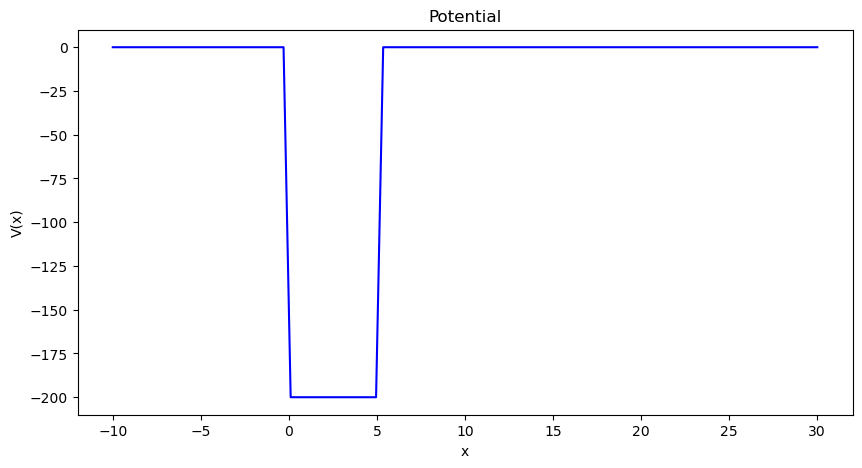

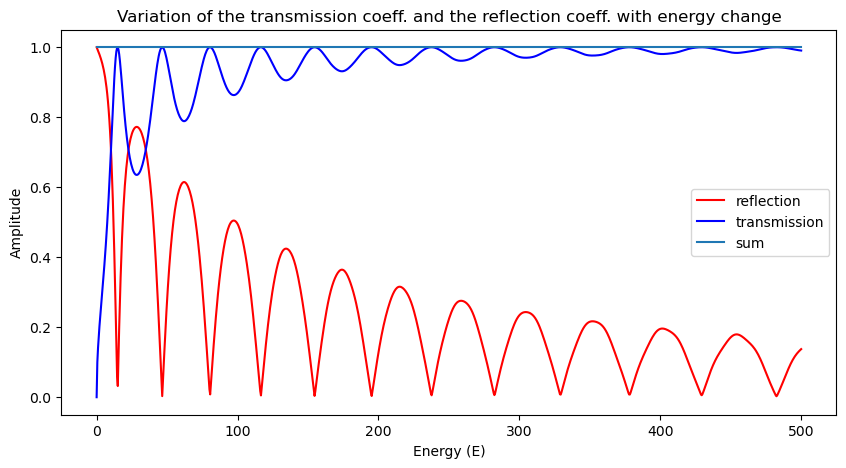

In [35]:
import numpy as np
import matplotlib.pyplot as plt


def solve_scattering(w, N, E, V):
    """
    Parameters:
    - w: Width of the potential barrier or well
    - N: Number of points on the grid
    - E: Particle energy
    - V: Potential function

    Returns:
    - reflected_amplitude:   Amplitude of the reflected wave
    - transmitted_amplitude: Amplitude of the transmitted wave
    - wave_function:         Wave function
    """
    
    e = E
    k = np.sqrt(e)
    x = np.linspace(0, w, N)
    dx = x[1] - x[0] 

    ucur = -2 + dx**2 * (e - V(x[-1]))
    R = np.zeros(N - 1, dtype="complex")
    Rcur = -1 / (ucur * 0.5 + 1j * k * dx)
    R[-1] = Rcur
    Rprev = 0

    for i in range(N - 2):
        ucur = -2 + dx**2 * (e - V(x[-2-i]))
        Rprev = -1 / (ucur + Rcur)
        R[-2-i] = Rprev
        Rcur = Rprev

    ucur = -2 + dx**2 * (e - V(x[0]))

    psi0 = 1j * 2 * k * dx / (Rprev + (ucur * 0.5 + 1j * k * dx))

    psin = np.zeros(N, dtype="complex")
    psin[0] = psi0

    for i in range(N - 1):
        psin[i+1] = psin[i] * R[i]

    return np.abs(-1 + psi0), np.abs(psin[-1]), psin


def v_barrier(x, h=2):
    """
    Parameters:
    - x: Particle position
    - h: Barrier height

    Returns:
    - V: Potential value at the specified point
    """
    return h


def v_well(x, w=1, h=-1, offset=0):
    """
    Parameters:
    - x:      Particle position
    - w:      Well width
    - h:      Well depth
    - offset: Well offset along the coordinate

    Returns:
    - V: Potential value at the specified point
    """
    if (x - offset < 0) or (x - offset > w):
        return 0
    return h


def v_nwell(x, w=1, h=-1, offset=0):
    """
    Parameters:
    - x:      Particle position
    - w:      Well width
    - h:      Well depth
    - offset: Well offset along the coordinate

    Returns:
    - V: Potential value at the specified point
    """
    
    if (x - offset < 0) or (x - offset > w):
        return 0
    return h * (4.0 / (w*w)) * ((x - offset - w) / 2.0)**2


x = np.linspace(-10, 30, 100)
v = np.zeros_like(x)

for i in range(100):
    #v[i] = v_barrier(x[i], h=200)
    v[i] = v_well(x[i], w=5, h=-200, offset=0)
    #v[i] = v_nwell(x[i], w=4, h=-200, offset=0)

plt.figure(figsize=(10,5))
plt.title("Potential")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.plot(x, v, c="blue")

e_space = np.linspace(0, 500, 1000)
reflected = []
transmitted = []

for e in e_space:
    #x1, x2,_= solve_scattering(1, 100, e, lambda x: v_barrier(x, h=200))
    x1, x2, _ = solve_scattering(10, 1000, e, lambda x: v_well(x, w=3, h=-200, offset=0))
    #x1, x2, _ = solve_scattering(10, 1000, e, lambda x: v_nwell(x, w=4, h=-200, offset=5))
    reflected.append(x1)
    transmitted.append(x2)

reflected = np.array(reflected)
transmitted = np.array(transmitted)

plt.figure(figsize=(10,5))
plt.plot(e_space, reflected, label="reflection", c="red")
plt.plot(e_space, transmitted, label="transmission", c="blue")
plt.plot(e_space, transmitted**2 + reflected**2, label="sum")
plt.legend()
plt.xlabel("Energy (E)")
plt.ylabel("Amplitude")
plt.title("Variation of the transmission coeff. and the reflection coeff. with energy change")
plt.show()
